In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
import io

In [ ]:
torch.manual_seed(180401036)

In [ ]:
uploaded = files.upload()

Saving cure_the_princess_validation.csv to cure_the_princess_validation (2).csv
Saving cure_the_princess_test.csv to cure_the_princess_test (2).csv
Saving cure_the_princess_train.csv to cure_the_princess_train (2).csv


In [ ]:
train_data = pd.read_csv(io.BytesIO(uploaded['cure_the_princess_train.csv']))
train_labels = train_data.iloc[:, -1]
train_data = train_data.iloc[:, :-1]

val_data = pd.read_csv(io.BytesIO(uploaded['cure_the_princess_validation.csv']))
val_labels = val_data.iloc[:, -1]
val_data = val_data.iloc[:, :-1] 

test_data = pd.read_csv(io.BytesIO(uploaded['cure_the_princess_test.csv']))
test_labels = test_data.iloc[:, -1]
test_data = test_data.iloc[:, :-1]

In [ ]:

class CureThePrincessDataset(Dataset):
    def __init__(self, data, targets):
        self.data = torch.tensor(data.values).float()
        self.targets = torch.tensor(targets.values.reshape(-1, 1)).float()

    def __getitem__(self, index):
        x = self.data[index]
        y = self.targets[index]
        return x, y

    def __len__(self):
        return len(self.data)


In [ ]:
train_dataset = CureThePrincessDataset(train_data, train_labels)
val_dataset = CureThePrincessDataset(val_data, val_labels)
test_dataset = CureThePrincessDataset(test_data, test_labels)

In [ ]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MultilayerPerceptron, self).__init__()
        
        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.layer3 = nn.Linear(hidden_size2, output_size)
        
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.sigmoid(self.layer3(x))
        return x
        
input_size = 13                 # Girdi boyutu
hidden_size1 = 100         # Ilk gizli katmandaki noron sayisi
hidden_size2 = 50           # Ikinci gizli katmandaki noron sayisi
output_size = 1                # Cikis katmandaki noron sayisi

model = MultilayerPerceptron(input_size, hidden_size1, hidden_size2, output_size)

In [ ]:
# Modelimiz ve veri kümemiz hazır
model = MultilayerPerceptron(input_size, hidden_size1, hidden_size2, output_size)
train_dataset = CureThePrincessDataset(train_data, train_labels)

# Hyperparameters
learning_rate = 0.001
batch_size = 32
num_epochs = 100

# Optimizer and Loss
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.BCELoss()

# DataLoader for batching
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Training loop
for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(train_loader):
        
        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, targets)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # Print loss after each epoch
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [1/100], Loss: 0.5494
Epoch [2/100], Loss: 0.3694
Epoch [3/100], Loss: 0.6522
Epoch [4/100], Loss: 0.3417
Epoch [5/100], Loss: 0.6212
Epoch [6/100], Loss: 0.6215
Epoch [7/100], Loss: 0.5852
Epoch [8/100], Loss: 0.3419
Epoch [9/100], Loss: 0.3569
Epoch [10/100], Loss: 0.3476
Epoch [11/100], Loss: 0.5324
Epoch [12/100], Loss: 0.5315
Epoch [13/100], Loss: 0.1937
Epoch [14/100], Loss: 0.2138
Epoch [15/100], Loss: 0.1844
Epoch [16/100], Loss: 0.1930
Epoch [17/100], Loss: 0.3069
Epoch [18/100], Loss: 0.5373
Epoch [19/100], Loss: 0.5879
Epoch [20/100], Loss: 0.2882
Epoch [21/100], Loss: 0.2407
Epoch [22/100], Loss: 0.1865
Epoch [23/100], Loss: 0.6173
Epoch [24/100], Loss: 0.3176
Epoch [25/100], Loss: 0.2576
Epoch [26/100], Loss: 0.2167
Epoch [27/100], Loss: 0.2097
Epoch [28/100], Loss: 0.3082
Epoch [29/100], Loss: 0.1856
Epoch [30/100], Loss: 0.3391
Epoch [31/100], Loss: 0.2688
Epoch [32/100], Loss: 0.4579
Epoch [33/100], Loss: 0.3786
Epoch [34/100], Loss: 0.3798
Epoch [35/100], Loss: 0

In [ ]:
def validate_model(model, data, labels):
    # modeli değerlendirmeye al
    model.eval()

    # verileri PyTorch tensorüne dönüştür
    data = torch.tensor(data.values).float()
    labels = torch.tensor(labels.values.reshape(-1, 1)).float()

    # verileri modele besle
    output = model(data)

    # tahminleri yuvarla
    output = torch.round(output)

    # doğruluğu hesapla
    accuracy = (output == labels).sum().item() / len(labels)

    return accuracy

val_accuracy = validate_model(model, val_data, val_labels)
print("Validation accuracy:", val_accuracy)
def validate_loss(model, data, labels):
    # modeli değerlendirmeye al
    model.eval()

    # verileri PyTorch tensorüne dönüştür
    data = torch.tensor(data.values).float()
    labels = torch.tensor(labels.values.reshape(-1, 1)).float()


    # verileri modele besle
    output = model(data)

    # loss'u hesapla
    loss = criterion(output, labels)

    return loss.item()


Validation accuracy: 0.9299363057324841


In [ ]:
test_data = pd.read_csv(io.BytesIO(uploaded['cure_the_princess_test.csv']))
test_labels = test_data.iloc[:, -1]
test_features = test_data.iloc[:, :-1]

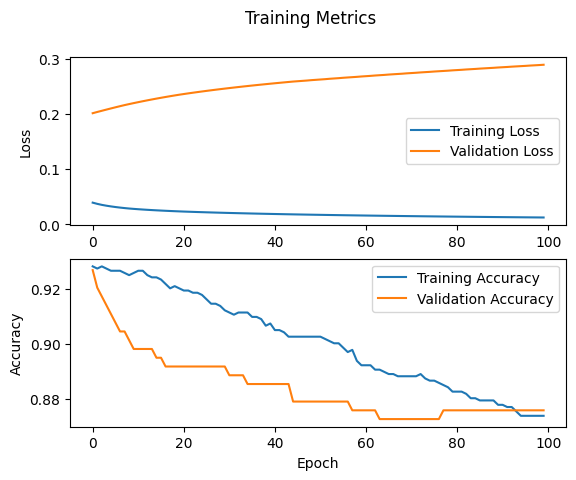

In [ ]:
# boş listeler oluştur
train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []

# Training loop
for epoch in range(num_epochs):
    # ...
    
    # Forward pass
    outputs = model(data)
    loss = criterion(outputs, targets)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # add loss and accuracy values to lists
    train_loss_list.append(loss.item())
    train_acc_list.append(validate_model(model, train_data, train_labels))
    val_loss_list.append(validate_loss(model, val_data, val_labels))
    val_acc_list.append(validate_model(model, val_data, val_labels))
    
    # ...
    
# plot the loss and accuracy curves
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
fig.suptitle('Training Metrics')

axs[0].plot(train_loss_list, label='Training Loss')
axs[0].plot(val_loss_list, label='Validation Loss')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(train_acc_list, label='Training Accuracy')
axs[1].plot(val_acc_list, label='Validation Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.show()


In [ ]:
test_features_tensor = torch.tensor(test_features.values).float()
test_labels_tensor = torch.tensor(test_labels.values).float()

In [ ]:
test_accuracy = validate_model(model, test_features, test_labels)
print("Test accuracy:", test_accuracy)


Test accuracy: 0.8652849740932642
